In [1]:
import sys
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')

import seaborn as sns
from ionpy.analysis import ResultsLoader
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE/"

%load_ext yamlmagic
%load_ext autoreload
%autoreload 2

In [2]:
from ese.experiment.analysis.inference import load_cal_inference_stats

inference_path = f"{root}/inference/11_17_23_WMH_Debug"

cal_inference_info = load_cal_inference_stats(
    log_dir=inference_path,
)

In [3]:
cal_inference_info.keys()

dict_keys(['pixel_info_dicts', 'image_info_df', 'metadata'])

In [4]:
metadata = cal_inference_info['metadata']

In [5]:
metadata.keys()

Index(['calibration.conf_interval_end', 'calibration.conf_interval_start',
       'calibration.num_bins', 'dataset._class', 'dataset.annotator',
       'dataset.axis', 'dataset.num_slices', 'dataset.preload',
       'dataset.slicing', 'dataset.split', 'dataset.task', 'dataset.version',
       'log.log_interval', 'log.root', 'log.save_calbration_error_maps',
       'log.track_image_level', 'log.track_pixel_level', 'model.exp_root',
       'model.num_workers', 'score.ignore_index', 'log_set'],
      dtype='object')

## Pixel-level Analysis

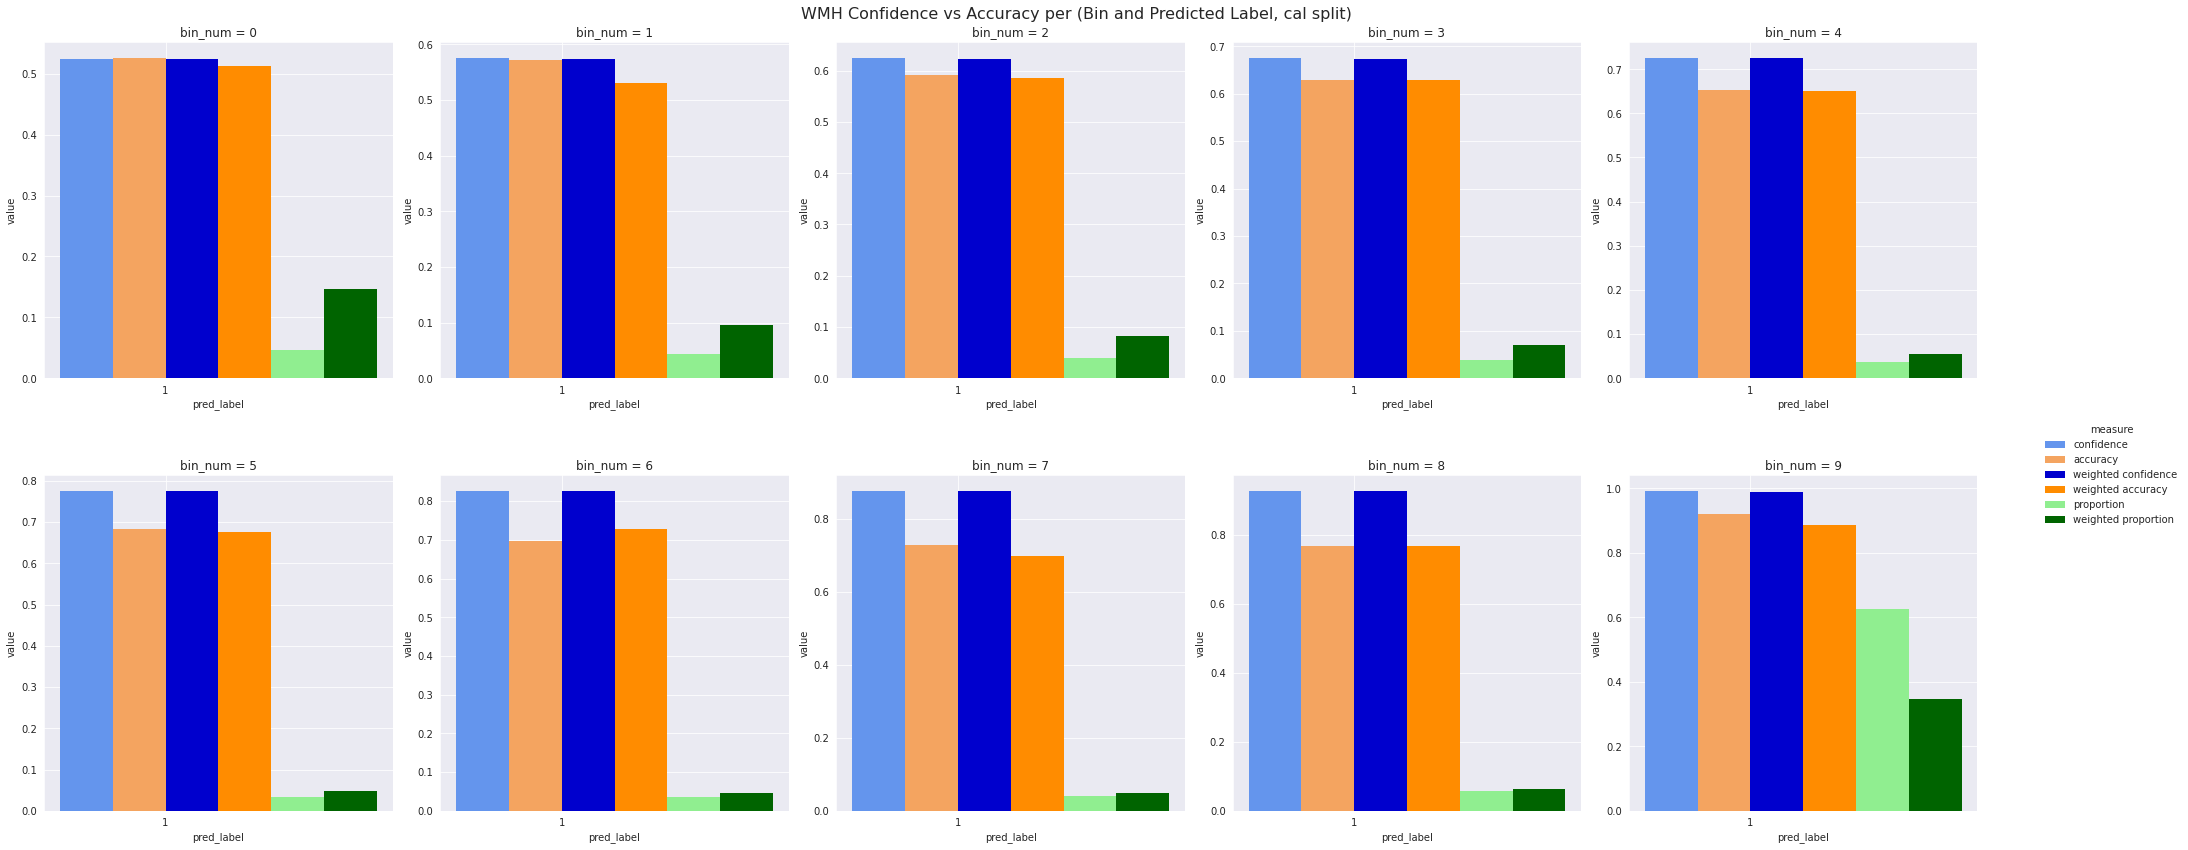

In [6]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence
from ese.experiment.analysis.utils import select_pixel_dict

for split in ["cal"]: 
    split_preds_dict = select_pixel_dict(
        pixel_meter_logdict=cal_inference_info["pixel_info_dicts"], 
        metadata=cal_inference_info["metadata"],
        kwargs={"dataset.split": split}
    ) 
    # Plot the accuracy vs confidence for this split.
    viz_accuracy_vs_confidence(
        split_preds_dict,
        title=f"WMH Confidence vs Accuracy per (Bin and Predicted Label, {split} split)",
        x="pred_label",
        col="bin_num",
        kind="bar",
        add_avg=False,
        facet_kws={'sharey': False, 'sharex': False}
        )

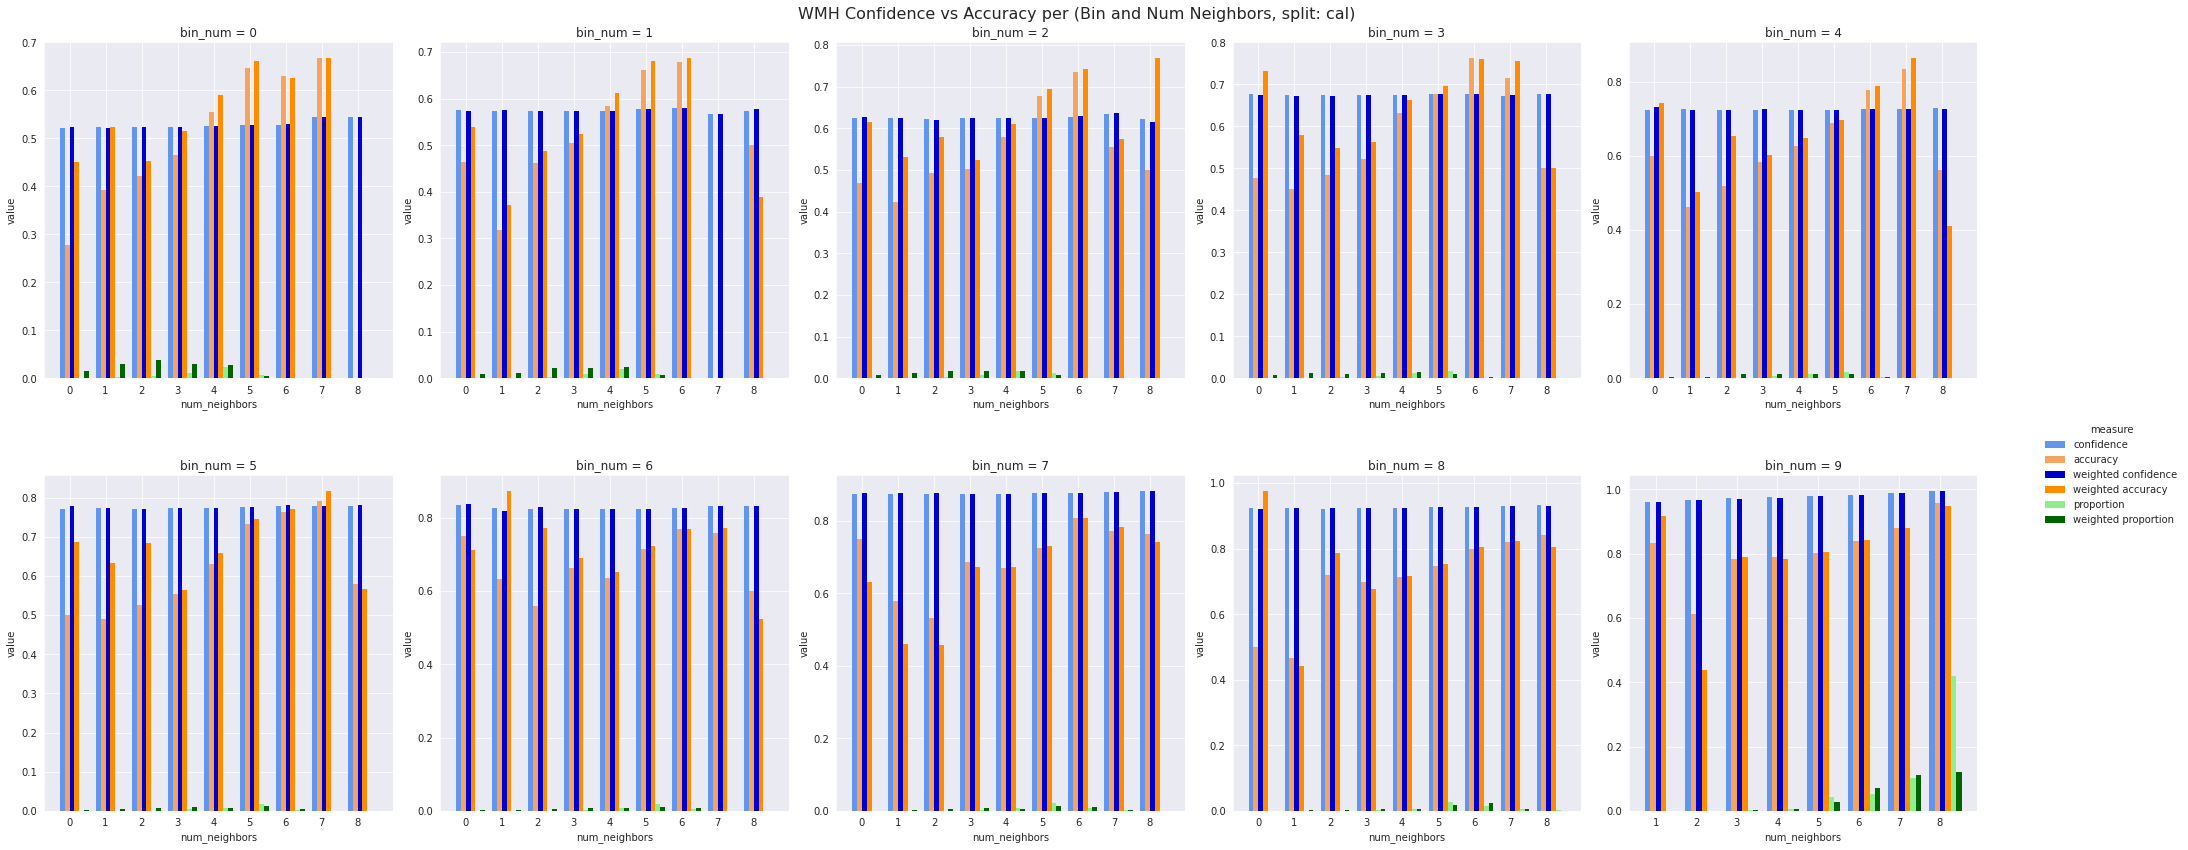

In [7]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence
from ese.experiment.analysis.utils import select_pixel_dict

for split in ["cal"]: 
    split_preds_dict = select_pixel_dict(
        pixel_meter_logdict=cal_inference_info["pixel_info_dicts"], 
        metadata=cal_inference_info["metadata"],
        kwargs={"dataset.split": split}
    ) 
    # Plot the accuracy vs confidence for this split.
    viz_accuracy_vs_confidence(
        split_preds_dict,
        title=f"WMH Confidence vs Accuracy per (Bin and Num Neighbors, split: {split})",
        x="num_neighbors",
        col="bin_num",
        kind="bar",
        add_avg=False,
        add_proportion=True,
        facet_kws={'sharey': False, 'sharex': False},
        )

## Image-level Analysis

In [8]:
image_info_df = cal_inference_info['image_info_df']

In [9]:
from ese.experiment.analysis.utils import reorder_splits

unique_image_df = reorder_splits(image_info_df.drop_constant())

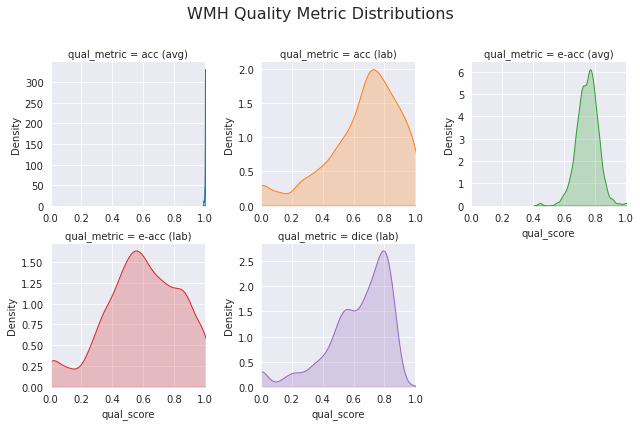

In [10]:
from ese.experiment.analysis.err_diagrams import viz_quality_metric_distributions

viz_quality_metric_distributions(
    unique_image_df, 
    title="WMH Quality Metric Distributions",
    col_wrap=3
)

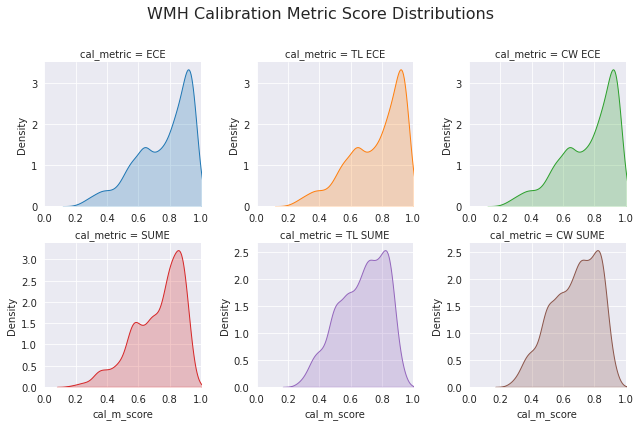

In [11]:
from ese.experiment.analysis.err_diagrams import viz_calibration_metric_distributions

viz_calibration_metric_distributions(
    unique_image_df, 
    title="WMH Calibration Metric Score Distributions",
    col_wrap=3
)

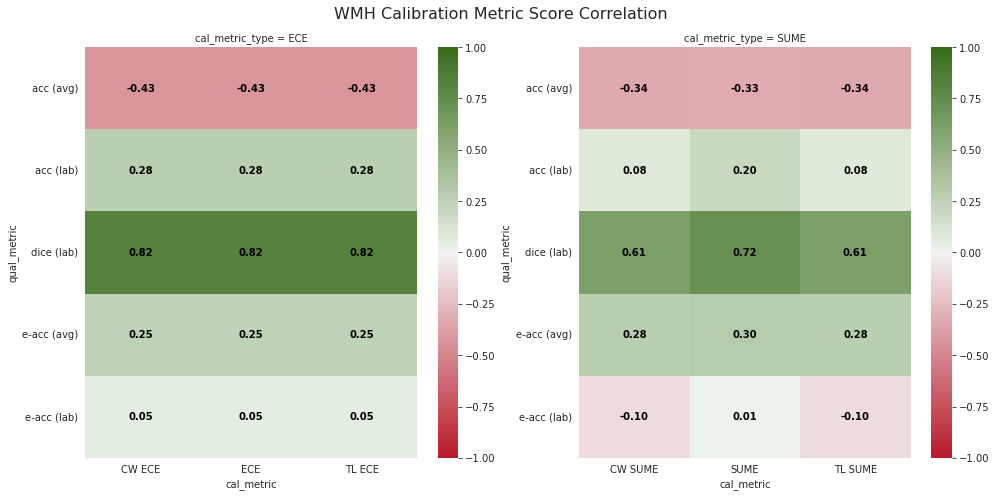

In [12]:
from ese.experiment.analysis.err_diagrams import viz_cal_metric_corr

viz_cal_metric_corr(
    unique_image_df,
    title="WMH Calibration Metric Score Correlation",
    heatmap_row="qual_metric",
    heatmap_col="cal_metric",
    col="cal_metric_type",
    height=7
)

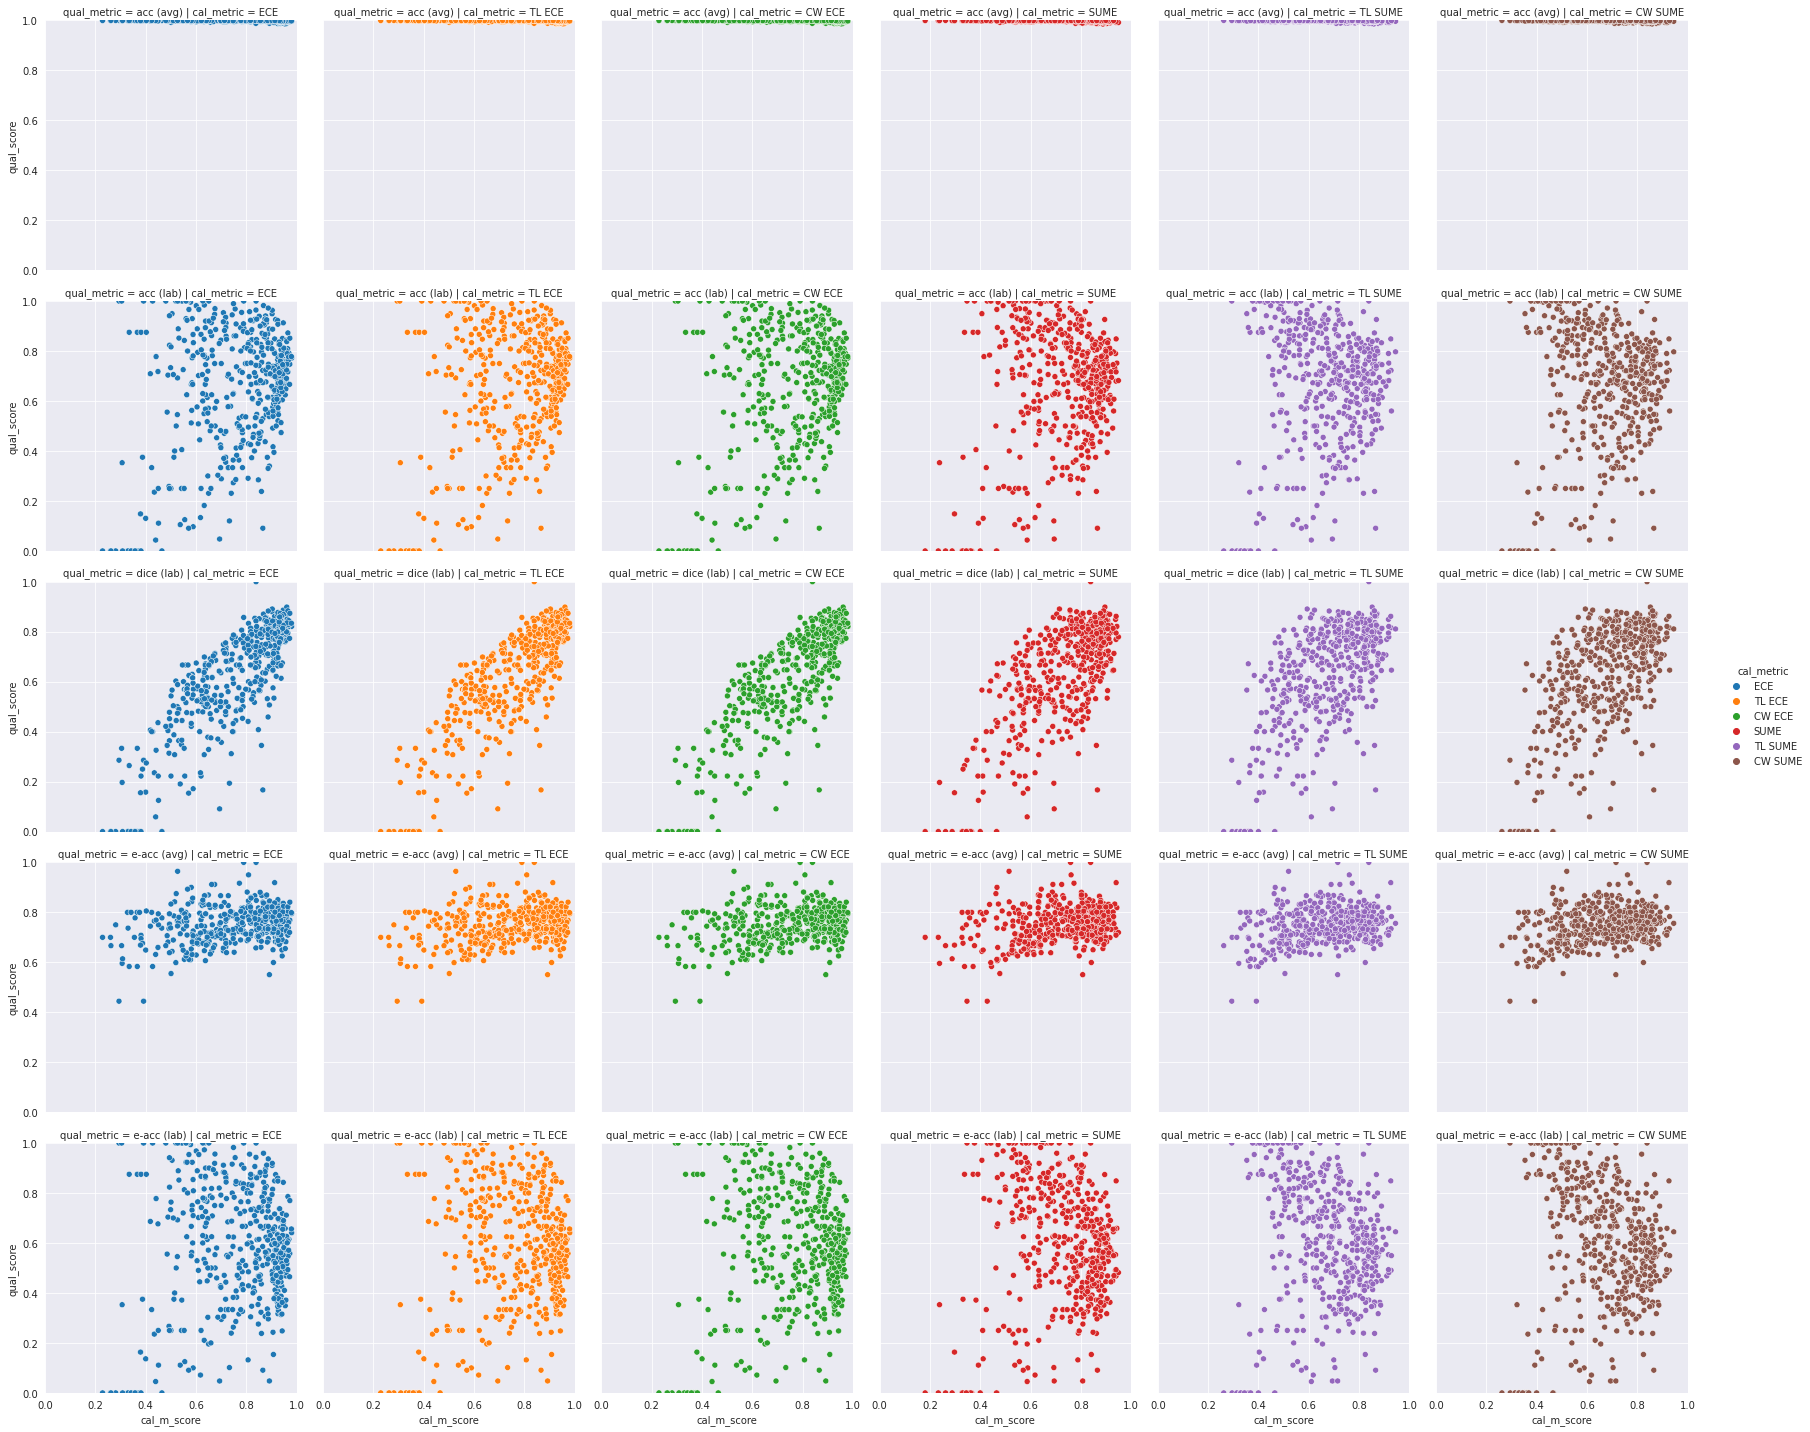

In [13]:
df_qm_sorted = unique_image_df.sort_values(by=["qual_metric", "cal_metric_type"])
g = sns.relplot(
    df_qm_sorted, 
    x="cal_m_score", 
    y="qual_score", 
    hue="cal_metric", 
    col="cal_metric", 
    row="qual_metric", 
    height=4, 
    aspect=1
    )
g.set(xlim=(0, 1), ylim=(0, 1))
g.tight_layout()